In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

In [3]:
from effort2.rates.BtoV import BtoV
from effort2.formfactors.formFactorBtoCBase import bToDStarCLN_1702_01521v2

In [4]:
rate = BtoV(bToDStarCLN_1702_01521v2, 40e-3, bToDStarCLN_1702_01521v2.m_B, bToDStarCLN_1702_01521v2.m_M) 

In [14]:
%%time
# Look at this execution time, no caches implemented! This is why you should use the new version
rate.Gamma()

CPU times: user 4.7 ms, sys: 26 µs, total: 4.73 ms
Wall time: 4.34 ms


2.293745821226628e-14

The error thrown here happens when you evaluate at the exact boundary of the w range. It can be neglected or you add/subtract epsilon to the defined boundaries w_min and w_max (see documentation).

/home/mapr/projects/eFFORT2/effort2/formfactors/formFactorBtoCBase.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / (2 * m_M * q2 ** 0.5) * ((m_B ** 2 - m_M ** 2 - q2) * (m_B + m_M) * self.A1(w)


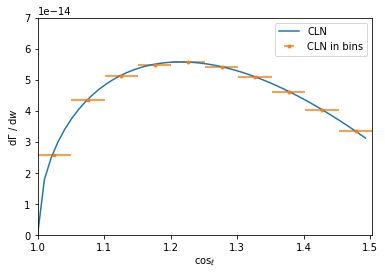

In [7]:
w = np.linspace(rate.w_min, rate.w_max)
wbins = np.linspace(rate.w_min, rate.w_max, num=11)

plt.plot(w, [rate.dGamma_dw(x) for x in w], label="CLN")
plt.errorbar(wbins[:-1] + (wbins[1] - wbins[0]) / 2, [rate.DGamma_Dw(l, u)/ (u-l) for (l, u) in zip(wbins, wbins[1:])], marker='.', xerr=(wbins[1] - wbins[0]) / 2, ls='', label="CLN in bins")
plt.xlim(min(w), max(w))
plt.ylim(0, 7e-14)
plt.xlabel("$\cos_\ell$")
plt.ylabel("d$\Gamma$ / d$w$")
plt.legend()
plt.show()
plt.close()

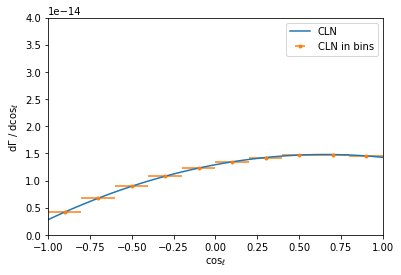

In [13]:
cosL = np.linspace(rate.cosL_min, rate.cosL_max)
cosLbins = np.linspace(rate.cosL_min, rate.cosL_max, num=11)

plt.plot(cosL, [rate.dGamma_dcosL(x) for x in cosL], label="CLN")
plt.errorbar(cosLbins[:-1] + (cosLbins[1] - cosLbins[0]) / 2, [rate.DGamma_DcosL(l, u)/ (u-l) for (l, u) in zip(cosLbins, cosLbins[1:])], marker='.', xerr=(cosLbins[1] - cosLbins[0]) / 2, ls='', label="CLN in bins")
plt.xlim(min(cosL), max(cosL))
plt.ylim(0, 4e-14)
plt.xlabel("$\cos_\ell$")
plt.ylabel("d$\Gamma$ / d$\cos_\ell$")
plt.legend()
plt.show()
plt.close()

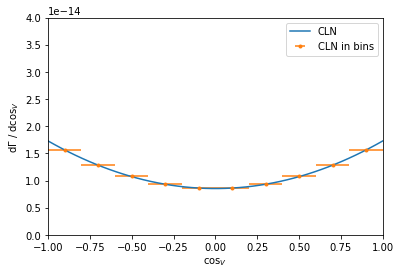

In [12]:
cosV = np.linspace(rate.cosV_min, rate.cosV_max)
cosVbins = np.linspace(rate.cosV_min, rate.cosV_max, num=11)

plt.plot(cosV, [rate.dGamma_dcosV(x) for x in cosV], label="CLN")
plt.errorbar(cosVbins[:-1] + (cosVbins[1] - cosVbins[0]) / 2, [rate.DGamma_DcosV(l, u)/ (u-l) for (l, u) in zip(cosVbins, cosVbins[1:])], marker='.', xerr=(cosVbins[1] - cosVbins[0]) / 2, ls='', label="CLN in bins")
plt.xlim(min(cosV), max(cosV))
plt.ylim(0, 4e-14)
plt.xlabel("$\cos_V$")
plt.ylabel("d$\Gamma$ / d$\cos_V$")
plt.legend()
plt.show()
plt.close()

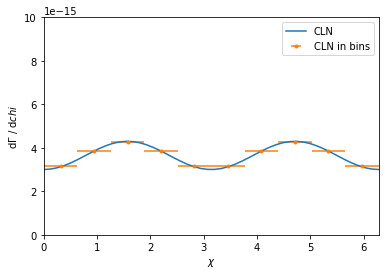

In [11]:
chi = np.linspace(rate.chi_min, rate.chi_max)
chibins = np.linspace(rate.chi_min, rate.chi_max, num=11)

plt.plot(chi, [rate.dGamma_dchi(x) for x in chi], label="CLN")
plt.errorbar(chibins[:-1] + (chibins[1] - chibins[0]) / 2, [rate.DGamma_Dchi(l, u)/ (u-l) for (l, u) in zip(chibins, chibins[1:])], marker='.', xerr=(chibins[1] - chibins[0]) / 2, ls='', label="CLN in bins")
plt.xlim(min(chi), max(chi))
plt.ylim(0, 1e-14)
plt.xlabel("$\chi$")
plt.ylabel("d$\Gamma$ / d$chi$")
plt.legend()
plt.show()
plt.close()